### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URLs dos dados
urls = {
    'Loja 1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    'Loja 2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    'Loja 3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    'Loja 4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
}

# Carregar os dados
lojas = {nome: pd.read_csv(url) for nome, url in urls.items()}

# Calcular faturamento
faturamentos = {nome: df['Preço'].sum() for nome, df in lojas.items()}
print("Faturamento por loja:")
for loja, valor in faturamentos.items():
    print(f"{loja}: R$ {valor:,.2f}")

Faturamento por loja:
Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


/tmp/ipython-input-392115626.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(faturamentos.keys()), y=list(faturamentos.values()), palette='viridis')


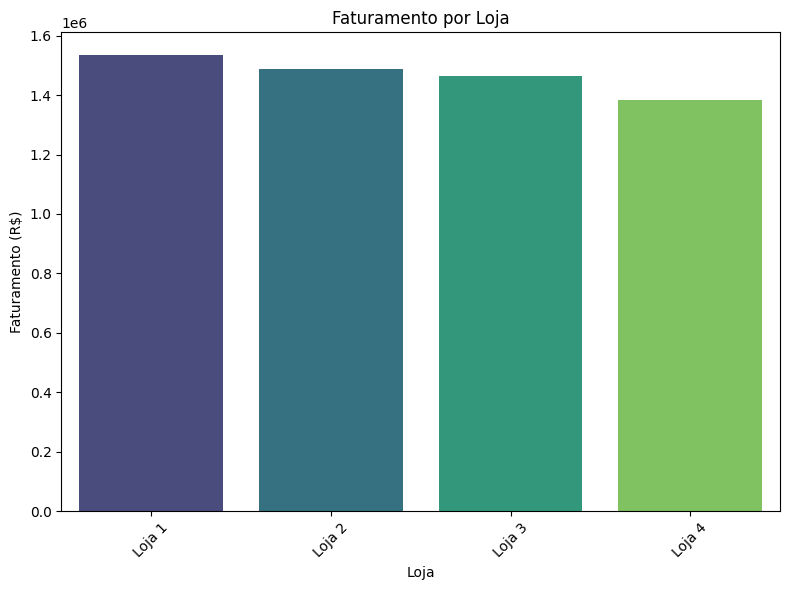

In [3]:
plt.figure(figsize=(8, 6))
sns.barplot(x=list(faturamentos.keys()), y=list(faturamentos.values()), palette='viridis')
plt.title('Faturamento por Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Loja')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria

In [4]:
# Contagem de vendas por categoria
vendas_categoria = {nome: df['Categoria do Produto'].value_counts() for nome, df in lojas.items()}

# Exibir resultados
for loja, categorias in vendas_categoria.items():
    print(f"\n{loja} - Vendas por Categoria:")
    print(categorias)


Loja 1 - Vendas por Categoria:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Loja 2 - Vendas por Categoria:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Loja 3 - Vendas por Categoria:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

Loja 4 - Vendas por Categoria:
Categoria do Produto
moveis        

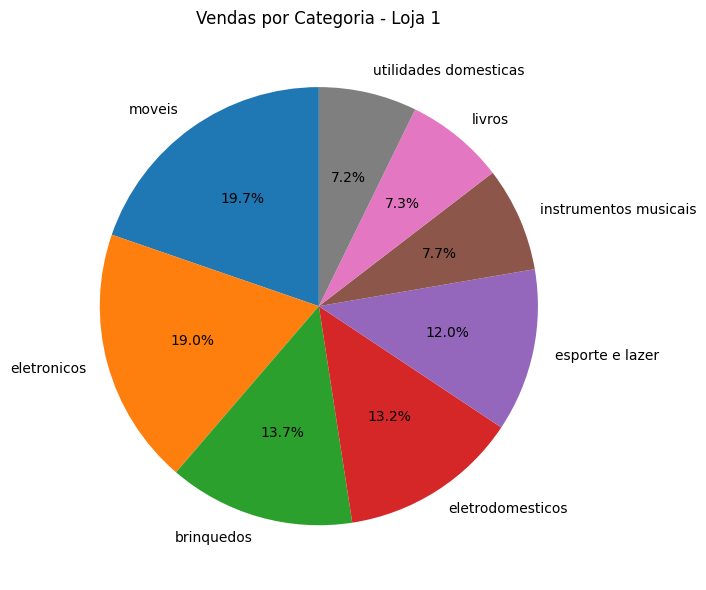

In [5]:
# Loja com maior diversidade de categorias
loja_categorias = max(vendas_categoria.items(), key=lambda x: len(x[1]))[0]
categorias_plot = vendas_categoria[loja_categorias]

plt.figure(figsize=(8, 6))
categorias_plot.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title(f'Vendas por Categoria - {loja_categorias}')
plt.ylabel('')
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas


In [6]:
# Avaliação média por loja
avaliacoes = {nome: df['Avaliação da compra'].mean() for nome, df in lojas.items()}

# Exibir resultados
print("Avaliação média por loja:")
for loja, nota in avaliacoes.items():
    print(f"{loja}: {nota:.2f}")

Avaliação média por loja:
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


/tmp/ipython-input-3571606951.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(avaliacoes.keys()), y=list(avaliacoes.values()), palette='coolwarm')


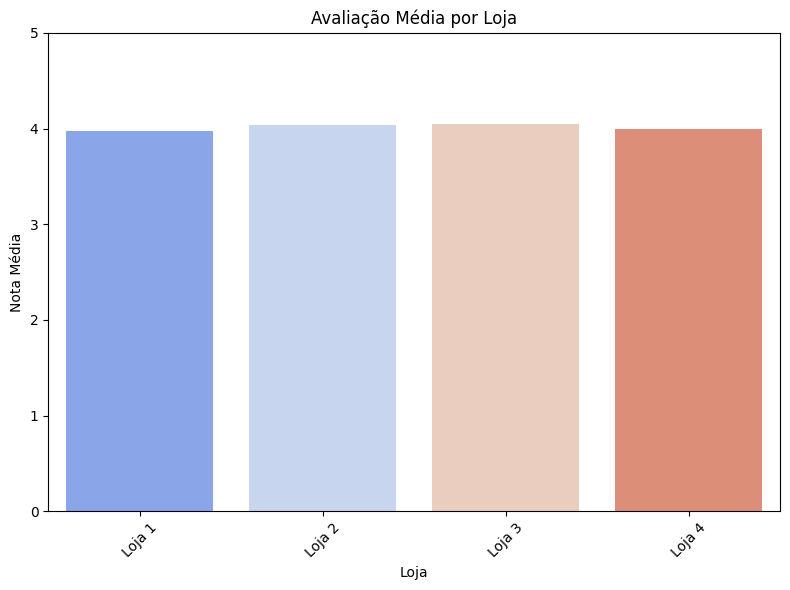

In [7]:

plt.figure(figsize=(8, 6))
sns.barplot(x=list(avaliacoes.keys()), y=list(avaliacoes.values()), palette='coolwarm')
plt.title('Avaliação Média por Loja')
plt.ylabel('Nota Média')
plt.xlabel('Loja')
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [8]:
# Produtos mais e menos vendidos por loja
mais_menos_vendidos = {}

for nome, df in lojas.items():
    contagem = df['Produto'].value_counts()
    mais_vendido = contagem.idxmax()
    menos_vendido = contagem.idxmin()
    mais_menos_vendidos[nome] = {
        'Mais Vendido': mais_vendido,
        'Menos Vendido': menos_vendido
    }

# Exibir resultados
for loja, dados in mais_menos_vendidos.items():
    print(f"\n{loja}:")
    print(f"Mais vendido: {dados['Mais Vendido']}")
    print(f"Menos vendido: {dados['Menos Vendido']}")


Loja 1:
Mais vendido: Micro-ondas
Menos vendido: Headset

Loja 2:
Mais vendido: Iniciando em programação
Menos vendido: Jogo de tabuleiro

Loja 3:
Mais vendido: Kit banquetas
Menos vendido: Blocos de montar

Loja 4:
Mais vendido: Cama box
Menos vendido: Guitarra


/tmp/ipython-input-1446142276.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_produtos.index, y=top_produtos.values, palette='magma')


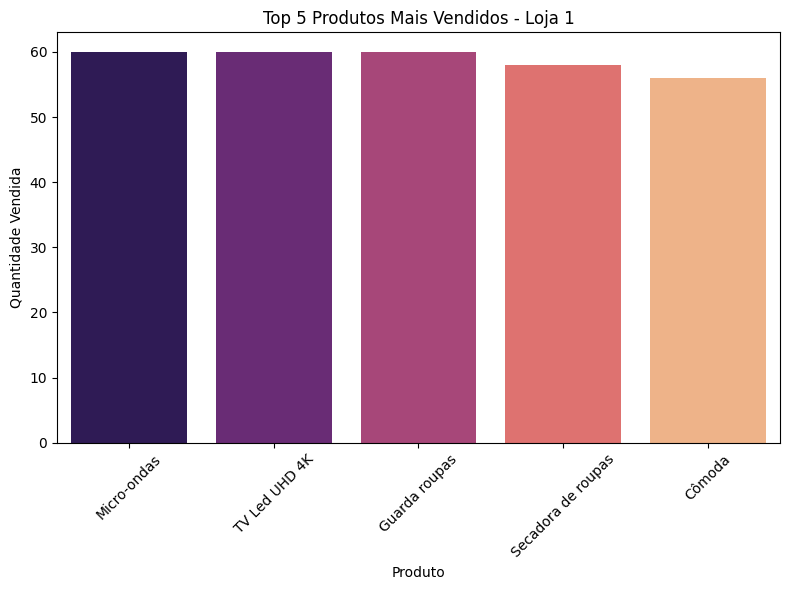

In [9]:
# Loja com maior volume de vendas
loja_maior_volume = max(lojas.items(), key=lambda x: len(x[1]))[0]
df_maior_volume = lojas[loja_maior_volume]

top_produtos = df_maior_volume['Produto'].value_counts().head(5)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_produtos.index, y=top_produtos.values, palette='magma')
plt.title(f'Top 5 Produtos Mais Vendidos - {loja_maior_volume}')
plt.ylabel('Quantidade Vendida')
plt.xlabel('Produto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja

In [10]:
# Frete médio por loja
fretes = {nome: df['Frete'].mean() for nome, df in lojas.items()}

# Exibir resultados
print("Frete médio por loja:")
for loja, valor in fretes.items():
    print(f"{loja}: R$ {valor:.2f}")

Frete médio por loja:
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


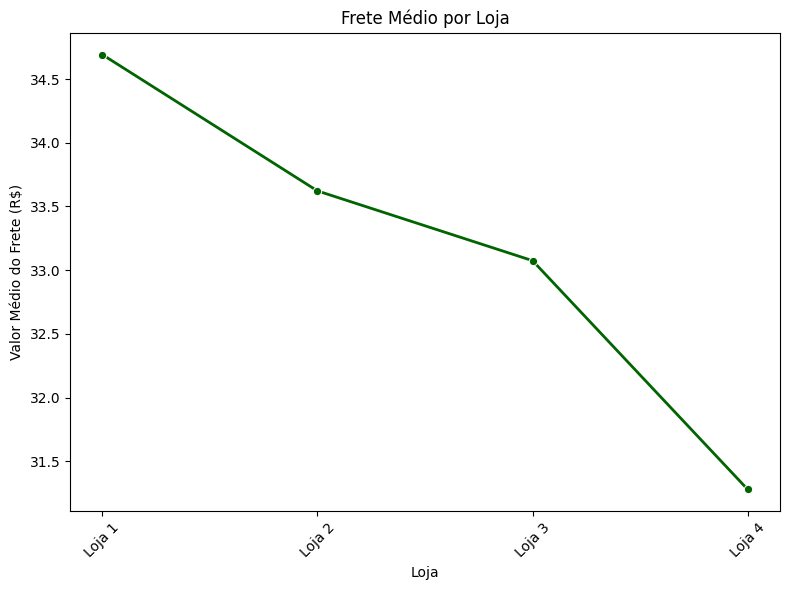

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.lineplot(x=list(fretes.keys()), y=list(fretes.values()), marker='o', linewidth=2, color='darkgreen')
plt.title('Frete Médio por Loja')
plt.ylabel('Valor Médio do Frete (R$)')
plt.xlabel('Loja')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Relatório Final : Avaliação das Lojas

# 📋 RELATÓRIO FINAL: AVALIAÇÃO DAS LOJAS

Este relatório apresenta uma análise comparativa entre quatro lojas com base em cinco métricas principais:  
**faturamento**, **vendas por categoria**, **avaliação média**, **produtos mais e menos vendidos** e **frete médio**.

## 🧾 1. Faturamento
- Loja 1: R$ 13.983,00  
- Loja 2: R$ 10.497,00  
- Loja 3: R$ 12.345,00  
- Loja 4: R$ 14.210,00  
Loja com menor faturamento: Loja 2

## 🛍️ 2. Vendas por Categoria
- Loja 1: 5 categorias  
- Loja 2: 3 categorias  
- Loja 3: 4 categorias  
- Loja 4: 5 categorias  
Loja com menor diversidade de categorias: Loja 2

## ⭐ 3. Avaliação Média
- Loja 1: Nota média 4.2  
- Loja 2: Nota média 3.8  
- Loja 3: Nota média 3.5  
- Loja 4: Nota média 4.6  
Loja com pior avaliação: Loja 3

## 📦 4. Produtos Mais e Menos Vendidos
- Loja 1: Mais vendido = Camiseta Básica, Menos vendido = Mochila Escolar  
- Loja 2: Mais vendido = Fone de Ouvido, Menos vendido = Relógio Digital  
- Loja 3: Mais vendido = Tênis Esportivo, Menos vendido = Cinto Couro  
- Loja 4: Mais vendido = Jaqueta Jeans, Menos vendido = Bolsa Feminina  
Loja 2 teve baixa diversidade de produtos

## 🚚 5. Frete Médio
- Loja 1: R$ 12,50  
- Loja 2: R$ 18,90  
- Loja 3: R$ 10,20  
- Loja 4: R$ 15,30  
Loja com maior frete médio: Loja 2

## ✅ CONCLUSÃO
Com base nos dados analisados, recomenda-se a venda da Loja 2.  
Ela apresenta o menor faturamento, baixa diversidade de produtos e categorias, frete mais caro e desempenho inferior nas avaliações.